In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.shape

(800, 242)

In [4]:
data.head()

,id,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,1,0.206472,0.372766,0.029087,0.093526,music,voice,-0.411385,0.024215,-0.201421,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,minor,0.526779,-0.205793,blu
1,2,-0.368479,0.372766,1.341977,0.093526,music,voice,-0.349921,-0.015672,-0.173045,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,major,-0.129683,-0.667979,blu
2,3,-0.631747,0.372766,-1.283803,-1.324366,speech,instrumental,4.235612,5.779127,3.973258,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,major,-1.022781,0.937795,blu
3,4,-0.190116,0.372766,1.341977,0.093526,music,voice,-0.307576,0.068818,-0.216986,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,major,0.074454,-0.406373,blu
4,5,0.588278,0.372766,1.341977,0.802473,music,instrumental,-0.332032,-1.078238,0.350680,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,major,0.919307,-0.917709,blu


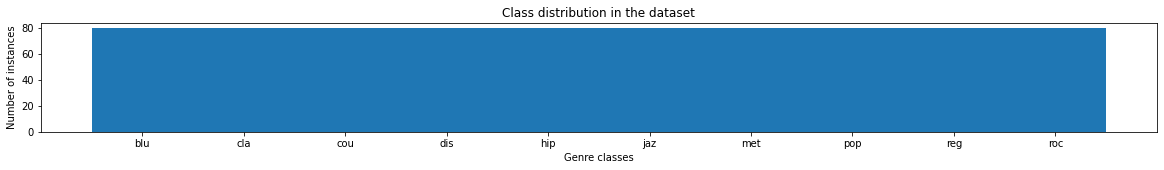

In [5]:
# Plotting the number of instances per class

classes, counts = np.unique(data['genre'],return_counts=True)
plt.figure(figsize=(20,2))
plt.bar(classes, counts, align='center', width=1)
plt.title('Class distribution in the dataset')
plt.xlabel('Genre classes')
plt.ylabel('Number of instances')
plt.show()

In [6]:
# Checking if no Nan or null values
data.isnull().sum().sum()

0

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def index_categorical_columns(data_copy):
    cols = data_copy.columns
    num_cols = data_copy._get_numeric_data().columns
    return list(set(cols) - set(num_cols))

In [8]:
index_categorical_columns(data)

['genre',
 'highlevel_speech_music_value',
 'highlevel_voice_instrumental_value',
 'tonal_key_mode_value']

In [9]:
data['genre'].unique()

array(['blu', 'cla', 'cou', 'dis', 'hip', 'jaz', 'met', 'pop', 'reg',
       'roc'], dtype=object)

In [10]:
labelencoder_genre = LabelEncoder()
Genres = labelencoder_genre.fit_transform(data['genre'])


labelencoder_speech = LabelEncoder()
data['highlevel_speech_music_value'] = labelencoder_speech.fit_transform(data['highlevel_speech_music_value'])


labelencoder_tonal_key = LabelEncoder()
data['tonal_key_mode_value'] = labelencoder_tonal_key.fit_transform(data['tonal_key_mode_value'])


labelencoder_voice = LabelEncoder()
data['highlevel_voice_instrumental_value'] = labelencoder_voice.fit_transform(data['highlevel_voice_instrumental_value'])

In [11]:
Y = np.array(Genres)
X = np.array(data.iloc[:,1:-1])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.3, random_state = 0, stratify=Y)

# Feature Selection

Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
F

Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
F

Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
F

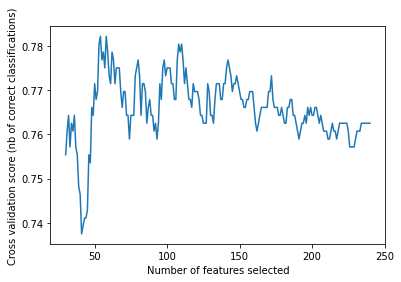

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


rf = LogisticRegression(max_iter=1500)

min_features_to_select = 30  

rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select, verbose=1)
rfecv.fit(X_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()




ranking = rfecv.ranking_
indexes = np.where(rfecv.support_==True)[0]
X_train_selected = X_train[:,indexes]
X_test_selected = X_test[:,indexes]


scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_selected = scaler.transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [16]:
# Chosen features
data.iloc[:,indexes]

,highlevel_speech_music_value,loudness_dynamic_complexity_dvar,loudness_larm_var,loudness_replay_gain_value,loudness_vicker_mean,rhythm_beats_loudness_bass_dvar,rhythm_beats_loudness_bass_mean,rhythm_beats_loudness_dvar,rhythm_beats_loudness_var,spectral_barkbands_00_dvar,...,spectral_pitch_salience_dvar,spectral_silence_rate_20dB_var,spectral_skewness_dvar,spectral_skewness_var,spectral_spread_dvar,spectral_strongpeak_mean,tempotap_bpm_estimates_var,tonal_chords_dissonance_mean,tonal_chords_strength_dvar,tonal_key_mode_value
0,0,-0.411385,-0.304162,-0.024487,0.919727,-0.172460,0.929212,-0.193266,-0.231590,-0.115289,...,0.307352,1.244087,-0.344900,-0.345782,0.017402,1.278099,0.378448,0.297177,-0.255337,1
1,0,-0.349921,-0.330522,-0.050286,0.578624,-0.419147,-0.315975,-0.358631,-0.397909,-0.222598,...,0.111924,-1.072118,-0.460114,-0.395388,-0.730034,-0.013611,-0.731175,-0.319468,-0.121114,0
2,1,4.235612,0.416157,-0.311997,-1.454938,0.661237,0.477024,-0.347312,-0.389079,-0.220981,...,0.692375,-1.812479,0.178100,0.320039,-0.545443,-1.590558,2.675544,-0.236246,-0.190639,0
3,0,-0.307576,-0.218878,-0.019932,0.486458,-0.428439,-0.821464,-0.350013,-0.398617,-0.222533,...,0.304036,-0.004179,-0.301809,-0.425729,-0.396848,-0.207445,1.042392,-0.107207,0.257633,0
4,0,-0.332032,-0.293164,-0.176837,0.814997,-0.617382,-0.884710,-0.362621,-0.417626,-0.219236,...,-0.022259,-1.939613,-0.640938,-0.596407,-0.812714,-0.206043,0.366684,-0.794839,-0.309481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0.559649,0.031107,0.904236,-1.111457,-0.617163,0.141716,-0.363282,-0.380200,-0.222379,...,-1.432917,-1.598782,-0.115258,0.616726,-0.764986,-0.731263,0.570079,-0.312586,-0.366172,0
796,0,-0.108340,-0.258317,-0.715605,0.647579,0.525682,-0.194888,0.009521,-0.069039,-0.117791,...,-0.805359,-0.379125,-0.673185,-0.585736,-0.552301,-0.897334,-0.719653,-0.950832,-0.284281,0
797,0,-0.156503,0.647687,0.045510,-0.803079,-0.352238,-0.131003,-0.319742,-0.185605,-0.159660,...,-0.966762,0.113032,-0.191460,0.071122,-0.355015,-0.813128,0.122850,-0.943058,-0.408811,0
798,0,-0.125633,-0.348287,-0.101118,1.561986,-0.262609,-0.519069,-0.321625,-0.354934,-0.222854,...,-0.692345,1.339776,-0.182105,-0.271547,-0.920254,0.668554,0.435424,-0.821921,-0.329513,0


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [299]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


C = range(1, 10, 1)


model = LogisticRegression(solver = 'liblinear',max_iter = 12_000, penalty='l1',tol=1e-5)

grid = dict(C=C)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, Y_train)



print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830952 using {'C': 8}
0.788095 (0.057353) with: {'C': 1}
0.808333 (0.060457) with: {'C': 2}
0.817857 (0.057106) with: {'C': 3}
0.823214 (0.049734) with: {'C': 4}
0.826786 (0.051991) with: {'C': 5}
0.827976 (0.048244) with: {'C': 6}
0.828571 (0.045783) with: {'C': 7}
0.830952 (0.047186) with: {'C': 8}
0.829762 (0.047634) with: {'C': 9}


In [18]:
from sklearn.model_selection import cross_val_score


lr = LogisticRegression(solver = 'saga',max_iter = 15_000, penalty='l1',tol=1e-5, C=8)
scores = cross_val_score(lr, X_train_selected, Y_train, cv=10, verbose=1)
    
    

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
lr.fit(X_train_selected, Y_train)
pred = lr.predict(X_test_selected)
np.mean(Y_test==pred)

In [28]:
lr_2 = LogisticRegression(solver = 'saga',max_iter = 20_000, penalty='l1',tol=1e-5, C=8)
scores = cross_val_score(lr, X_train_pca, Y_train, cv=10, verbose=1)
    
    

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

0.73 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished


In [26]:
lr_2.fit(X_train_pca, Y_train)
pred_2 = lr_2.predict(X_test_pca)
np.mean(Y_test==pred_2)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7708333333333334


 Global accuracy : 0.7708333333333334


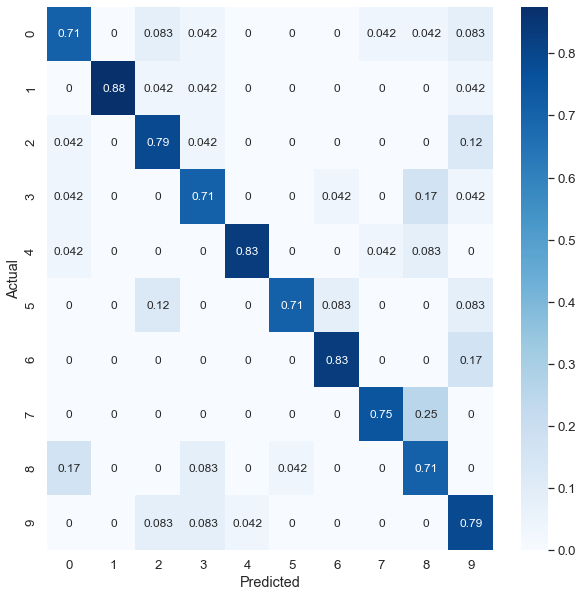

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred_2), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

print('\n Global accuracy :', np.mean(Y_test==pred_2))

In [308]:
feature_names = dict()
for i in range(len(indexes)):
    feature_names[i] = data.columns[indexes[i]]

In [309]:
feature_names

{0: 'highlevel_speech_music_value',
 1: 'loudness_dynamic_complexity_dvar',
 2: 'loudness_larm_var',
 3: 'loudness_replay_gain_value',
 4: 'loudness_vicker_mean',
 5: 'rhythm_beats_loudness_bass_dvar',
 6: 'rhythm_beats_loudness_bass_mean',
 7: 'rhythm_beats_loudness_dvar',
 8: 'rhythm_beats_loudness_var',
 9: 'spectral_barkbands_00_dvar',
 10: 'spectral_barkbands_02_var',
 11: 'spectral_barkbands_03_dvar',
 12: 'spectral_barkbands_05_dvar',
 13: 'spectral_barkbands_05_var',
 14: 'spectral_barkbands_07_dvar',
 15: 'spectral_barkbands_20_dvar',
 16: 'spectral_barkbands_21_dvar',
 17: 'spectral_barkbands_23_dvar',
 18: 'spectral_barkbands_24_dvar',
 19: 'spectral_barkbands_skewness_dvar',
 20: 'spectral_barkbands_spread_var',
 21: 'spectral_crest_mean',
 22: 'spectral_decrease_mean',
 23: 'spectral_energybandratio_high_mean',
 24: 'spectral_energybandratio_high_var',
 25: 'spectral_flatness_db_dvar',
 26: 'spectral_mfcc_00_var',
 27: 'spectral_mfcc_02_dvar',
 28: 'spectral_mfcc_02_mean',

In [313]:
df = pd.DataFrame(data=coef, columns=feature_names.values())

In [315]:
df.shape

(10, 50)

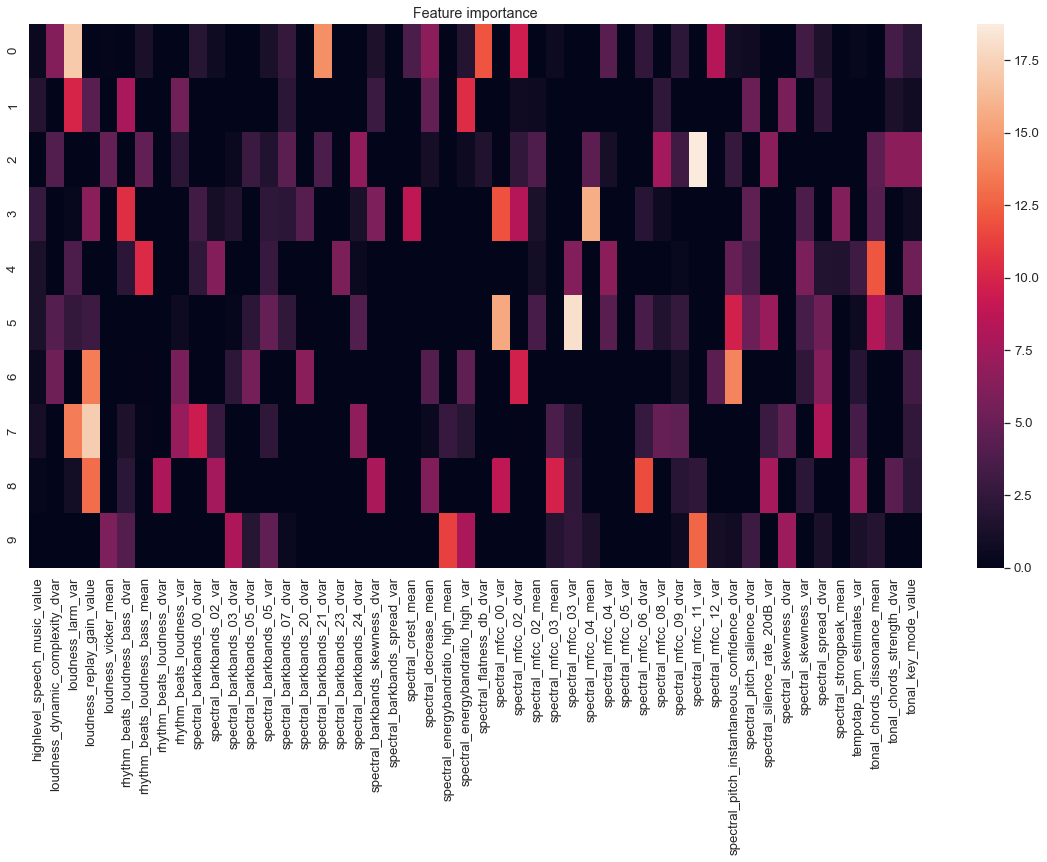

In [317]:
plt.figure(figsize=(20,10))
plt.title('Feature importance')
plt.xlabel('Feature Number')
plt.ylabel('Class Number')
sns.heatmap(df)
plt.savefig('features.png')

In [311]:
coef = np.abs(lr.coef_)
#print(np.argsort(coef,axis=1)[:,-5:])


 Global accuracy : 0.8291666666666667


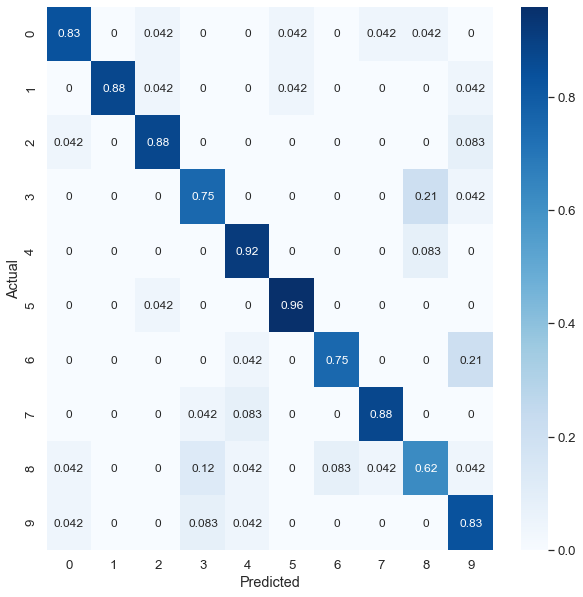

In [307]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

print('\n Global accuracy :', np.mean(Y_test==pred))

In [48]:
Y_train_cat = to_categorical(Y_train)

In [52]:
Y_test_cat = to_categorical(Y_test)

In [86]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, SpatialDropout2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import History 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm

In [238]:
reduce_lr =tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4,
                              patience=1000, min_lr=0.00001, verbose=1)


model = Sequential()


model.add(Dense(32, input_shape=(X_train_selected.shape[1],), activation='tanh'
                , kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [239]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(model.summary())

history = History()

history = model.fit(X_train_selected, Y_train_cat, epochs=1500, validation_split = 0.2, batch_size=16,
                    shuffle=True,
                   callbacks=[reduce_lr])

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                1632      
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 10)                330       
Total params: 1,962
Trainable params: 1,962
Non-trainable params: 0
_________________________________________________________________
None
Train on 448 samples, validate on 112 samples
Epoch 1/1500
448/448 [==============================] - 1s 3ms/sample - loss: 3.0173 - acc: 0.1228 - val_loss: 2.8636 - val_acc: 0.1339
Epoch 2/1500
448/448 [==============================] - 0s 397us/sample - loss: 2.8376 - acc: 0.1473 - val_loss: 2.7527 - val_acc: 0.1696
Epoch 3/1500
448/448 [==============================] - 

Epoch 113/1500
448/448 [==============================] - 0s 221us/sample - loss: 1.1479 - acc: 0.7701 - val_loss: 1.0519 - val_acc: 0.7679
Epoch 114/1500
448/448 [==============================] - 0s 189us/sample - loss: 1.1593 - acc: 0.7232 - val_loss: 1.0659 - val_acc: 0.7768
Epoch 115/1500
448/448 [==============================] - 0s 208us/sample - loss: 1.1413 - acc: 0.7612 - val_loss: 1.0456 - val_acc: 0.8036
Epoch 116/1500
448/448 [==============================] - 0s 191us/sample - loss: 1.1338 - acc: 0.7545 - val_loss: 1.0479 - val_acc: 0.7589
Epoch 117/1500
448/448 [==============================] - 0s 180us/sample - loss: 1.1294 - acc: 0.7879 - val_loss: 1.0473 - val_acc: 0.7857
Epoch 118/1500
448/448 [==============================] - 0s 180us/sample - loss: 1.1161 - acc: 0.7723 - val_loss: 1.0434 - val_acc: 0.7768
Epoch 119/1500
448/448 [==============================] - 0s 197us/sample - loss: 1.1280 - acc: 0.7455 - val_loss: 1.0409 - val_acc: 0.7768
Epoch 120/1500
448/4

448/448 [==============================] - 0s 166us/sample - loss: 0.9459 - acc: 0.8147 - val_loss: 0.8511 - val_acc: 0.8214
Epoch 230/1500
448/448 [==============================] - 0s 174us/sample - loss: 0.9062 - acc: 0.8170 - val_loss: 0.8679 - val_acc: 0.8036
Epoch 231/1500
448/448 [==============================] - 0s 160us/sample - loss: 0.9385 - acc: 0.8192 - val_loss: 0.8540 - val_acc: 0.7857
Epoch 232/1500
448/448 [==============================] - 0s 163us/sample - loss: 0.8924 - acc: 0.8237 - val_loss: 0.8708 - val_acc: 0.8036
Epoch 233/1500
448/448 [==============================] - 0s 176us/sample - loss: 0.8961 - acc: 0.8147 - val_loss: 0.8545 - val_acc: 0.8214
Epoch 234/1500
448/448 [==============================] - 0s 184us/sample - loss: 0.9316 - acc: 0.8058 - val_loss: 0.8506 - val_acc: 0.8036
Epoch 235/1500
448/448 [==============================] - 0s 210us/sample - loss: 0.9172 - acc: 0.8192 - val_loss: 0.8516 - val_acc: 0.7857
Epoch 236/1500
448/448 [===========

448/448 [==============================] - 0s 180us/sample - loss: 0.8014 - acc: 0.8438 - val_loss: 0.7801 - val_acc: 0.8125
Epoch 346/1500
448/448 [==============================] - 0s 174us/sample - loss: 0.8001 - acc: 0.8549 - val_loss: 0.7750 - val_acc: 0.8125
Epoch 347/1500
448/448 [==============================] - 0s 160us/sample - loss: 0.8055 - acc: 0.8482 - val_loss: 0.7625 - val_acc: 0.8125
Epoch 348/1500
448/448 [==============================] - 0s 170us/sample - loss: 0.8272 - acc: 0.8326 - val_loss: 0.7826 - val_acc: 0.8125
Epoch 349/1500
448/448 [==============================] - 0s 161us/sample - loss: 0.7908 - acc: 0.8326 - val_loss: 0.7666 - val_acc: 0.8125
Epoch 350/1500
448/448 [==============================] - 0s 188us/sample - loss: 0.8185 - acc: 0.8304 - val_loss: 0.7716 - val_acc: 0.7946
Epoch 351/1500
448/448 [==============================] - 0s 167us/sample - loss: 0.8047 - acc: 0.8348 - val_loss: 0.7722 - val_acc: 0.7857
Epoch 352/1500
448/448 [===========

448/448 [==============================] - 0s 244us/sample - loss: 0.7328 - acc: 0.8504 - val_loss: 0.7269 - val_acc: 0.7857
Epoch 462/1500
448/448 [==============================] - 0s 175us/sample - loss: 0.7358 - acc: 0.8482 - val_loss: 0.7267 - val_acc: 0.8125
Epoch 463/1500
448/448 [==============================] - 0s 168us/sample - loss: 0.7279 - acc: 0.8571 - val_loss: 0.7117 - val_acc: 0.8482
Epoch 464/1500
448/448 [==============================] - 0s 209us/sample - loss: 0.7586 - acc: 0.8259 - val_loss: 0.7805 - val_acc: 0.8393
Epoch 465/1500
448/448 [==============================] - 0s 208us/sample - loss: 0.7281 - acc: 0.8527 - val_loss: 0.7295 - val_acc: 0.7679
Epoch 466/1500
448/448 [==============================] - 0s 167us/sample - loss: 0.7622 - acc: 0.8147 - val_loss: 0.7133 - val_acc: 0.8482
Epoch 467/1500
448/448 [==============================] - 0s 195us/sample - loss: 0.7286 - acc: 0.8527 - val_loss: 0.7174 - val_acc: 0.8214
Epoch 468/1500
448/448 [===========

448/448 [==============================] - 0s 228us/sample - loss: 0.6833 - acc: 0.8482 - val_loss: 0.6848 - val_acc: 0.8393
Epoch 578/1500
448/448 [==============================] - 0s 189us/sample - loss: 0.6679 - acc: 0.8638 - val_loss: 0.6908 - val_acc: 0.8571
Epoch 579/1500
448/448 [==============================] - 0s 180us/sample - loss: 0.6529 - acc: 0.8728 - val_loss: 0.6749 - val_acc: 0.8304
Epoch 580/1500
448/448 [==============================] - 0s 178us/sample - loss: 0.6595 - acc: 0.8772 - val_loss: 0.6800 - val_acc: 0.7946
Epoch 581/1500
448/448 [==============================] - 0s 169us/sample - loss: 0.6664 - acc: 0.8795 - val_loss: 0.6943 - val_acc: 0.8393
Epoch 582/1500
448/448 [==============================] - 0s 161us/sample - loss: 0.7061 - acc: 0.8527 - val_loss: 0.6851 - val_acc: 0.8304
Epoch 583/1500
448/448 [==============================] - 0s 178us/sample - loss: 0.6880 - acc: 0.8549 - val_loss: 0.7006 - val_acc: 0.8393
Epoch 584/1500
448/448 [===========

448/448 [==============================] - 0s 208us/sample - loss: 0.6584 - acc: 0.8549 - val_loss: 0.6743 - val_acc: 0.8304
Epoch 694/1500
448/448 [==============================] - 0s 230us/sample - loss: 0.6247 - acc: 0.8817 - val_loss: 0.6685 - val_acc: 0.8393
Epoch 695/1500
448/448 [==============================] - 0s 228us/sample - loss: 0.6421 - acc: 0.8750 - val_loss: 0.6640 - val_acc: 0.8214
Epoch 696/1500
448/448 [==============================] - 0s 176us/sample - loss: 0.6496 - acc: 0.8728 - val_loss: 0.6913 - val_acc: 0.8125
Epoch 697/1500
448/448 [==============================] - 0s 164us/sample - loss: 0.6292 - acc: 0.8906 - val_loss: 0.6691 - val_acc: 0.7946
Epoch 698/1500
448/448 [==============================] - 0s 174us/sample - loss: 0.6364 - acc: 0.8549 - val_loss: 0.6903 - val_acc: 0.8304
Epoch 699/1500
448/448 [==============================] - 0s 159us/sample - loss: 0.6443 - acc: 0.8638 - val_loss: 0.6652 - val_acc: 0.8214
Epoch 700/1500
448/448 [===========

448/448 [==============================] - 0s 200us/sample - loss: 0.6059 - acc: 0.8750 - val_loss: 0.6480 - val_acc: 0.8393
Epoch 810/1500
448/448 [==============================] - 0s 224us/sample - loss: 0.6467 - acc: 0.8638 - val_loss: 0.6593 - val_acc: 0.8571
Epoch 811/1500
448/448 [==============================] - 0s 202us/sample - loss: 0.5936 - acc: 0.8795 - val_loss: 0.6520 - val_acc: 0.8304
Epoch 812/1500
448/448 [==============================] - 0s 176us/sample - loss: 0.6125 - acc: 0.8728 - val_loss: 0.6539 - val_acc: 0.8482
Epoch 813/1500
448/448 [==============================] - 0s 202us/sample - loss: 0.6205 - acc: 0.8616 - val_loss: 0.6420 - val_acc: 0.8393
Epoch 814/1500
448/448 [==============================] - 0s 205us/sample - loss: 0.5854 - acc: 0.8795 - val_loss: 0.6599 - val_acc: 0.8393
Epoch 815/1500
448/448 [==============================] - 0s 215us/sample - loss: 0.5924 - acc: 0.8817 - val_loss: 0.6340 - val_acc: 0.8304
Epoch 816/1500
448/448 [===========

448/448 [==============================] - 0s 165us/sample - loss: 0.5946 - acc: 0.8683 - val_loss: 0.6469 - val_acc: 0.8482
Epoch 926/1500
448/448 [==============================] - 0s 186us/sample - loss: 0.5842 - acc: 0.8906 - val_loss: 0.6532 - val_acc: 0.8393
Epoch 927/1500
448/448 [==============================] - 0s 166us/sample - loss: 0.5777 - acc: 0.8929 - val_loss: 0.6360 - val_acc: 0.8304
Epoch 928/1500
448/448 [==============================] - 0s 159us/sample - loss: 0.6328 - acc: 0.8549 - val_loss: 0.6354 - val_acc: 0.8482
Epoch 929/1500
448/448 [==============================] - 0s 176us/sample - loss: 0.5749 - acc: 0.8906 - val_loss: 0.6514 - val_acc: 0.8304
Epoch 930/1500
448/448 [==============================] - 0s 164us/sample - loss: 0.5811 - acc: 0.8728 - val_loss: 0.6509 - val_acc: 0.8482
Epoch 931/1500
448/448 [==============================] - 0s 170us/sample - loss: 0.5933 - acc: 0.8839 - val_loss: 0.6403 - val_acc: 0.8036
Epoch 932/1500
448/448 [===========

448/448 [==============================] - 0s 199us/sample - loss: 0.5747 - acc: 0.8772 - val_loss: 0.6351 - val_acc: 0.8125
Epoch 1042/1500
448/448 [==============================] - 0s 472us/sample - loss: 0.5975 - acc: 0.8795 - val_loss: 0.6293 - val_acc: 0.8482
Epoch 1043/1500
448/448 [==============================] - 0s 346us/sample - loss: 0.5535 - acc: 0.8929 - val_loss: 0.6122 - val_acc: 0.8393
Epoch 1044/1500
448/448 [==============================] - 0s 243us/sample - loss: 0.5849 - acc: 0.8705 - val_loss: 0.6551 - val_acc: 0.8393
Epoch 1045/1500
448/448 [==============================] - 0s 240us/sample - loss: 0.5721 - acc: 0.8884 - val_loss: 0.6241 - val_acc: 0.8571
Epoch 1046/1500
448/448 [==============================] - 0s 255us/sample - loss: 0.5624 - acc: 0.8862 - val_loss: 0.6474 - val_acc: 0.8393
Epoch 1047/1500
448/448 [==============================] - 0s 316us/sample - loss: 0.5713 - acc: 0.8839 - val_loss: 0.6490 - val_acc: 0.8661
Epoch 1048/1500
448/448 [====

448/448 [==============================] - 0s 343us/sample - loss: 0.5656 - acc: 0.8839 - val_loss: 0.6311 - val_acc: 0.8214
Epoch 1158/1500
448/448 [==============================] - 0s 394us/sample - loss: 0.5650 - acc: 0.8772 - val_loss: 0.6528 - val_acc: 0.8304
Epoch 1159/1500
448/448 [==============================] - 0s 247us/sample - loss: 0.5485 - acc: 0.9018 - val_loss: 0.6357 - val_acc: 0.8304
Epoch 1160/1500
448/448 [==============================] - 0s 225us/sample - loss: 0.5570 - acc: 0.8862 - val_loss: 0.6400 - val_acc: 0.8482
Epoch 1161/1500
448/448 [==============================] - 0s 267us/sample - loss: 0.5532 - acc: 0.8884 - val_loss: 0.6295 - val_acc: 0.8482
Epoch 1162/1500
448/448 [==============================] - 0s 219us/sample - loss: 0.5308 - acc: 0.9040 - val_loss: 0.6222 - val_acc: 0.8661
Epoch 1163/1500
448/448 [==============================] - 0s 239us/sample - loss: 0.5416 - acc: 0.8862 - val_loss: 0.6206 - val_acc: 0.8214
Epoch 1164/1500
448/448 [====

448/448 [==============================] - 0s 400us/sample - loss: 0.5272 - acc: 0.8862 - val_loss: 0.6230 - val_acc: 0.8304
Epoch 1274/1500
448/448 [==============================] - 0s 322us/sample - loss: 0.5294 - acc: 0.8906 - val_loss: 0.6478 - val_acc: 0.8393
Epoch 1275/1500
448/448 [==============================] - 0s 247us/sample - loss: 0.5525 - acc: 0.8638 - val_loss: 0.6574 - val_acc: 0.8571
Epoch 1276/1500
448/448 [==============================] - 0s 264us/sample - loss: 0.5576 - acc: 0.8705 - val_loss: 0.6437 - val_acc: 0.8304
Epoch 1277/1500
448/448 [==============================] - 0s 214us/sample - loss: 0.5511 - acc: 0.8549 - val_loss: 0.6298 - val_acc: 0.8393
Epoch 1278/1500
448/448 [==============================] - 0s 229us/sample - loss: 0.5531 - acc: 0.8795 - val_loss: 0.6579 - val_acc: 0.8393
Epoch 1279/1500
448/448 [==============================] - 0s 217us/sample - loss: 0.5348 - acc: 0.8951 - val_loss: 0.6166 - val_acc: 0.8125
Epoch 1280/1500
448/448 [====

448/448 [==============================] - 0s 444us/sample - loss: 0.5196 - acc: 0.8929 - val_loss: 0.6315 - val_acc: 0.8393
Epoch 1390/1500
448/448 [==============================] - 0s 328us/sample - loss: 0.5528 - acc: 0.8750 - val_loss: 0.6048 - val_acc: 0.8393
Epoch 1391/1500
448/448 [==============================] - 0s 260us/sample - loss: 0.5180 - acc: 0.8862 - val_loss: 0.6484 - val_acc: 0.8393
Epoch 1392/1500
448/448 [==============================] - 0s 271us/sample - loss: 0.5412 - acc: 0.8638 - val_loss: 0.6504 - val_acc: 0.8214
Epoch 1393/1500
448/448 [==============================] - 0s 542us/sample - loss: 0.5342 - acc: 0.8951 - val_loss: 0.6596 - val_acc: 0.8393
Epoch 1394/1500
448/448 [==============================] - 0s 413us/sample - loss: 0.5425 - acc: 0.8772 - val_loss: 0.6288 - val_acc: 0.8393
Epoch 1395/1500
448/448 [==============================] - 0s 334us/sample - loss: 0.5481 - acc: 0.8750 - val_loss: 0.6123 - val_acc: 0.8571
Epoch 1396/1500
448/448 [====

In [240]:
pred_train= model.predict(X_train_selected)
scores = model.evaluate(X_train_selected, Y_train_cat, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(100*scores[1], 100*(1 - scores[1])))   
 
print('-----------------------------------------------')
pred_test= model.predict(X_test_selected)
scores2 = model.evaluate(X_test_selected, Y_test_cat, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(100*scores2[1], 100*(1 - scores2[1])))    

Accuracy on training data: 94.82142925262451% 
 Error on training data: 5.178570747375488
-----------------------------------------------
Accuracy on test data: 80.83333373069763% 
 Error on test data: 19.166666269302368


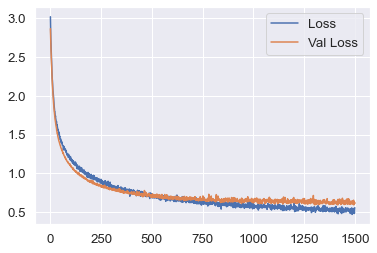

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'])
plt.show()

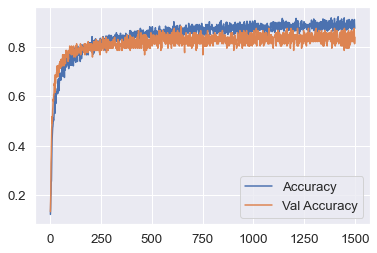

In [242]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Val Accuracy'])
plt.show()


 Global accuracy : 0.7833333333333333


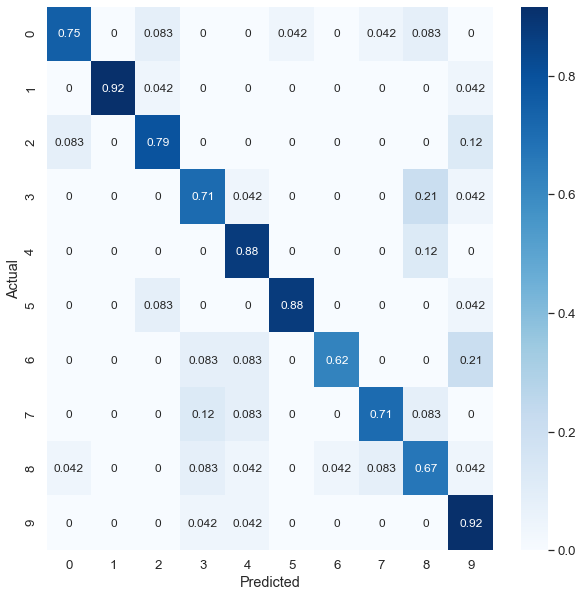

In [237]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, np.argmax(pred_test,axis=1)), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

print('\n Global accuracy :', np.mean(Y_test==np.argmax(pred_test,axis=1)))